# 多分类问题中的混淆矩阵

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 

In [2]:
# 加载数据
digits = datasets.load_digits()

x = digits.data
y = digits.target

In [4]:
# 数据分离
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 666)

In [5]:
# 使用logistics regression进行分类
from sklearn.linear_model import LogisticRegression

multi_clf = LogisticRegression()
multi_clf.fit(x_train, y_train)
multi_clf.score(x_test, y_test)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.93115438108484

In [10]:
decisions = multi_clf.decision_function(x_test)
y_predict = multi_clf.predict(x_test)

In [11]:
# 多分类问题函数使用
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [12]:
precision_score(y_test, y_predict, average="micro")

0.93115438108484

In [13]:
recall_score(y_test, y_predict, average="micro")

0.93115438108484

In [14]:
confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]], dtype=int64)

## 绘制混淆矩阵

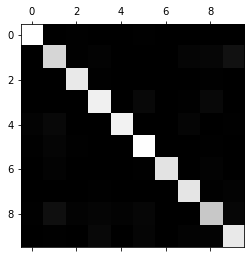

In [16]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [18]:
row_sums = np.sum(cfm, axis=1)
row_sums

array([149, 143, 136, 149, 150, 152, 136, 136, 140, 147], dtype=int64)

In [19]:
err_matrix = cfm / row_sums
err_matrix

array([[0.98657718, 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.86013986, 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.98529412, 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.9261745 , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.92666667,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.96052632, 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.96323529, 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

In [21]:
np.fill_diagonal(err_matrix, 0)
err_matrix

array([[0.        , 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.        , 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

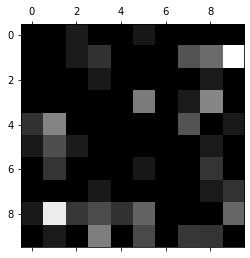

In [22]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()

# 总结：

* 1、多分类问题可以直接使用混淆矩阵来显示
* 2、可以通过绘制混淆矩阵来观察模型的不足，可以单独的改变某一分类的阈值来提高模型的质量